In [1]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use("seaborn-v0_8-darkgrid")


2025-06-13 16:07:22.258145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749830842.482021      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749830842.548188      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
from tqdm import tqdm # show progress bar of for loop

In [3]:
files=os.listdir("../input/mma-facial-expression/MMAFEDB/train")
files

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

In [4]:
image_array=[]
label_array=[]
path="../input/mma-facial-expression/MMAFEDB/train/"
for i in range(len(files)):
    # files in sub-folder
    file_sub=os.listdir(path+files[i])
    #print(len(file_sub))
    # loop through each files
    # for neutral and happy dataset we will use only 18000 image
    if(files[i]=="neutral" or files[i]=="happy"):
        for k in tqdm(range(18000)):
            # read image
            img=cv2.imread(path+files[i]+"/"+file_sub[k])
            # convert image from BGR to RGB
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            # append image_array with img
            image_array.append(img)
            label_array.append(i)
            # i is interger from 0-6
            # run this block
    else:
        for k in tqdm(range(len(file_sub))):
            # read image
            img=cv2.imread(path+files[i]+"/"+file_sub[k])
            # convert image from BGR to RGB
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            # append image_array with img
            image_array.append(img)
            label_array.append(i)
            # i is interger from 0-6
            # run this block
    
    

100%|██████████| 18000/18000 [01:34<00:00, 191.34it/s]


In [5]:
a,b=np.unique(label_array,return_counts="True")
a

array([0, 1, 2, 3, 4, 5, 6])

In [6]:
b

array([ 8113,  4859,  6566, 18000, 12223,  3231, 18000])

In [7]:
import gc
gc.collect()

0

In [8]:
image_array=np.array(image_array)/255.0
label_array=np.array(label_array)


In [9]:
label_to_text={0:"surprise",1:"fear",2:"angry",3:"neutral",4:"sad",5:"disgust",6:"happy"}

In [10]:
label_to_text[1]

'fear'

In [11]:
print(f"Number of images: {len(image_array)}")
print(f"Number of labels: {len(label_array)}")


Number of images: 70992
Number of labels: 70992


In [12]:
min_len = min(len(image_array), len(label_array))
image_array = image_array[:min_len]
label_array = label_array[:min_len]


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(image_array,label_array,test_size=0.1)
gc.collect()

0

In [14]:
label_to_text={0:"surprise",1:"fear",2:"angry",3:"neutral",4:"sad",5:"disgust",6:"happy"}

In [15]:
label_to_text[2]

'angry'

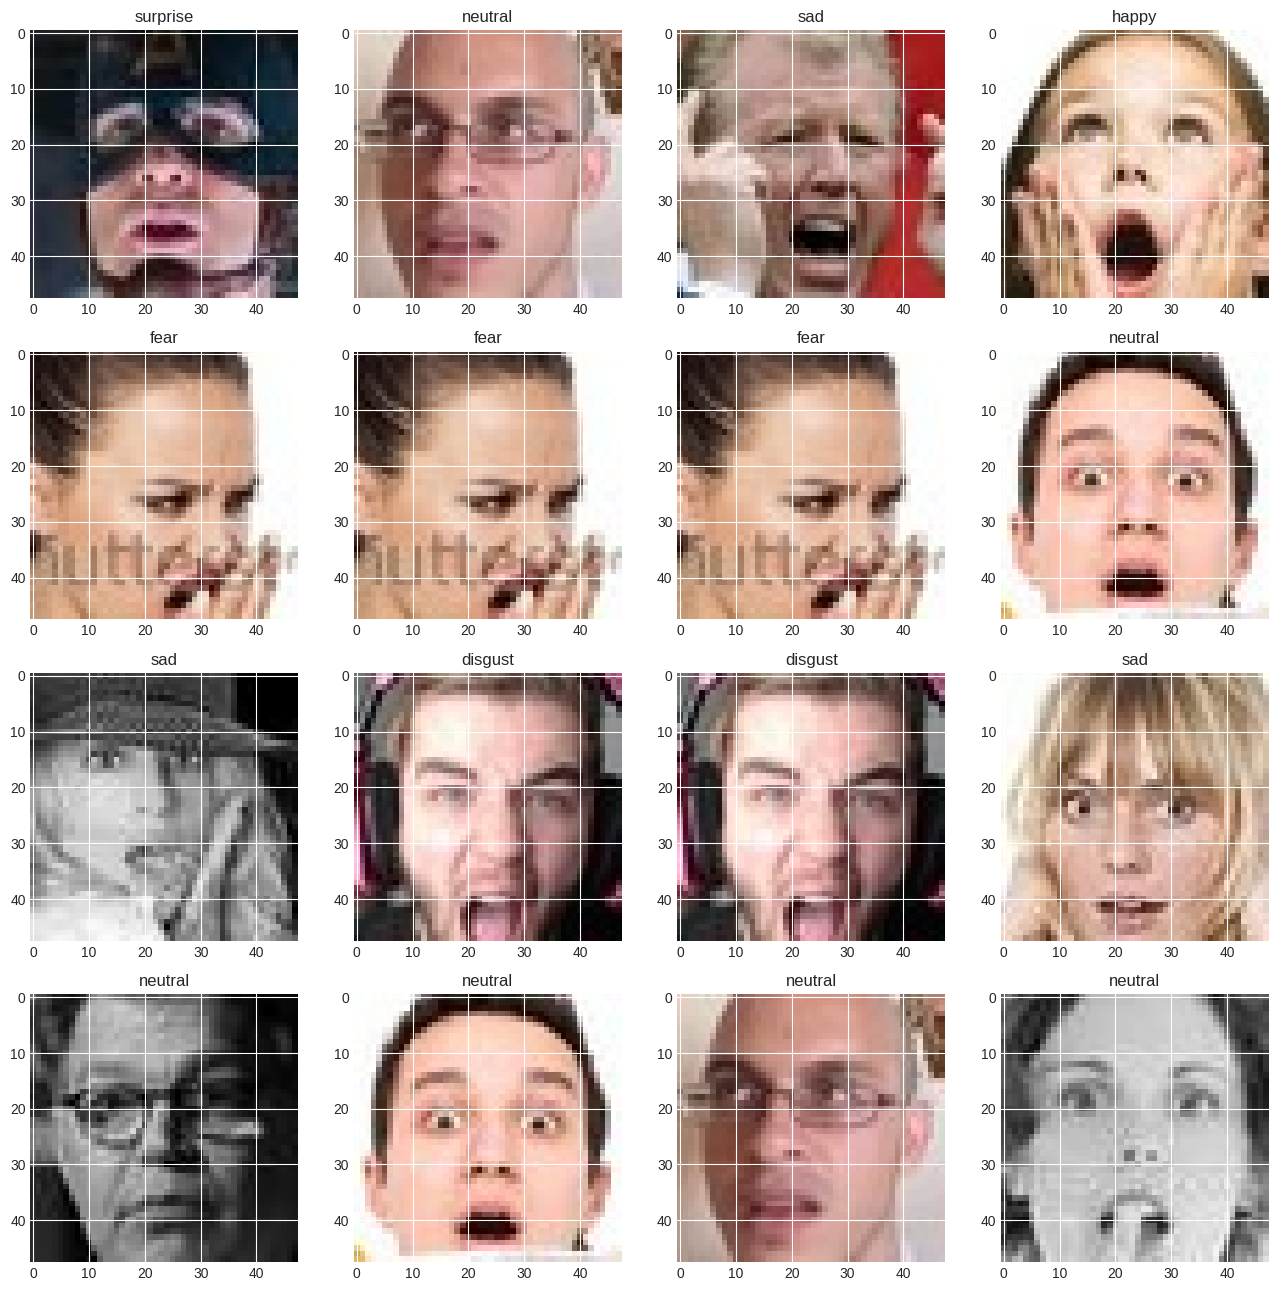

In [16]:
def show_examples(image,label,idx):
    # create 4x4 figure
    fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(16,16))
    # loop through each figure
    for idx_f,ax in zip(idx,axes.ravel()):
        # add image to figure
        ax.imshow(image[idx_f].squeeze(),cmap="gray")
        # add title to each figure
        ax.set_title(label_to_text[label[idx_f]])
    plt.show()
idx=np.random.choice(16,16)
show_examples(image_array,Y_train,idx)

In [17]:
#Starting with building model

In [18]:
from keras import layers,callbacks,utils,applications,optimizers
from keras.models import Sequential,Model,load_model

In [19]:
from tensorflow.keras import layers, models, applications
from tensorflow.keras.models import Sequential

model = Sequential()
pretrained_model = applications.MobileNetV2(input_shape=(48, 48, 3), include_top=False, weights="imagenet")
pretrained_model.trainable = True
model.add(pretrained_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1))
model.summary()


/tmp/ipykernel_35/3534539548.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model = applications.MobileNetV2(input_shape=(48, 48, 3), include_top=False, weights="imagenet")
I0000 00:00:1749831236.934740      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749831236.935385      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 2, 2, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 2,225,153 (8.49 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [20]:
from tensorflow.keras.optimizers import Adam


In [21]:
model.compile(optimizer=Adam(0.0001),loss="mean_squared_error",metrics=["mae"])

In [22]:
ckp_path = "trained_model/model.weights.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=ckp_path,
    monitor="val_mae",
    save_best_only=True,
    save_weights_only=True,
    mode="auto"
)


In [23]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    factor=0.9,
    monitor="val_mae",
    mode="auto",
    cooldown=0,
    patience=5,
    verbose=1,
    min_lr=1e-6
)


In [24]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # '2' = only errors, no warnings or info


In [25]:
BATCH_SIZE = 32
EPOCHS = 50 

In [26]:
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[model_checkpoint, reduce_lr])

Epoch 1/50


I0000 00:00:1749831280.065088     101 service.cc:148] XLA service 0x7c8100020f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749831280.065833     101 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749831280.065854     101 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749831283.304935     101 cuda_dnn.cc:529] Loaded cuDNN version 90300
E0000 00:00:1749831287.861472     101 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749831287.995852     101 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


   6/1997 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - loss: 19.0630 - mae: 3.7626  

I0000 00:00:1749831299.058134     101 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1993/1997 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.1652 - mae: 1.8037

E0000 00:00:1749831333.558950     100 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1749831333.692763     100 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


1997/1997 ━━━━━━━━━━━━━━━━━━━━ 108s 27ms/step - loss: 5.1622 - mae: 1.8032 - val_loss: 7.4714 - val_mae: 2.2504 - learning_rate: 1.0000e-04
Epoch 2/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 2.9883 - mae: 1.3867 - val_loss: 3.2305 - val_mae: 1.4117 - learning_rate: 1.0000e-04
Epoch 3/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - loss: 2.5636 - mae: 1.2731 - val_loss: 2.6794 - val_mae: 1.2756 - learning_rate: 1.0000e-04
Epoch 4/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - loss: 2.2728 - mae: 1.1836 - val_loss: 2.5418 - val_mae: 1.2400 - learning_rate: 1.0000e-04
Epoch 5/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - loss: 2.0432 - mae: 1.1063 - val_loss: 2.9634 - val_mae: 1.3336 - learning_rate: 1.0000e-04
Epoch 6/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - loss: 1.8507 - mae: 1.0407 - val_loss: 2.6646 - val_mae: 1.2509 - learning_rate: 1.0000e-04
Epoch 7/50
1997/1997 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - loss: 1.6488 - mae: 0.9719 - val_loss: 3.6578 - val_

In [27]:
model.load_weights(ckp_path)

In [28]:
prediction_val=model.predict(X_test,batch_size=BATCH_SIZE)

222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step


In [29]:
prediction_val[:10]

array([[4.393609 ],
       [1.2493229],
       [3.2011783],
       [5.8919764],
       [5.6928167],
       [4.7116733],
       [3.4880483],
       [2.04804  ],
       [5.9965525],
       [6.01835  ]], dtype=float32)

In [30]:
Y_test[:10]

array([6, 2, 2, 6, 6, 4, 0, 0, 6, 6])

Converting Model to tensor flowlite model

In [31]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()
with open("model.tflite","wb") as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpl31p3wt_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136906361755728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472697616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472699536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472699152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472698000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472699728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472698384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472700304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472699920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472697808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136905472701

W0000 00:00:1749832882.199796      35 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1749832882.199833      35 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1749832882.336592      35 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
